# Portfolio with the Maximum Sortino Ratio for the Banking Sector

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
        'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [3]:
df.to_csv("banking.csv")

In [4]:
df = pd.read_csv("banking.csv", index_col=0)

In [5]:
df.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS     SBIN.NS  \
Date                                                                           
2017-01-02   576.642578    222.009186    713.249329   442.843628  239.208252   
2017-01-03   573.174377    224.168030    710.205994   450.261475  240.484818   
2017-01-04   571.054871    221.260193    694.091064   448.135010  238.520859   
2017-01-05   571.392090    226.679352    697.433838   453.030762  240.926697   
2017-01-06   574.980774    227.472412    715.294861   450.212036  241.466782   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
Date                                                     
2017-01-02    1064.019287      63.415531      58.841454  
2017-01-03    1076.885864      63.511543      58.793064  
2017-01-04    1076.445557      63.127499      57.970448  
2017-01-05    1103.255249      64.807693      58.696285  
2017-01-06    1119.399658      64.519653      58.696285

In [6]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
Date                                                                         
2017-01-03    -0.006033      0.009677     -0.004276     0.016612  0.005322   
2017-01-04    -0.003705     -0.013057     -0.022952    -0.004734 -0.008200   
2017-01-05     0.000590      0.024197      0.004804     0.010865  0.010036   
2017-01-06     0.006261      0.003492      0.025287    -0.006241  0.002239   
2017-01-09     0.001298      0.002128     -0.010658    -0.005397  0.004666   
...                 ...           ...           ...          ...       ...   
2021-12-27     0.008236      0.012166      0.014226     0.006942  0.002404   
2021-12-28     0.006869     -0.000272      0.000817     0.004898  0.006853   
2021-12-29    -0.004769     -0.000136     -0.006047    -0.007355 -0.014854   
2021-12-30     0.005248      0.000000     -0.005086    -0.002464 -0.005960   
2021-12-31     0.012173      0.006030      0.023006     0.014398  0.019186   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
Date                                                     
2017-01-03       0.012020       0.001513      -0.000823  
2017-01-04      -0.000409      -0.006065      -0.014091  
2017-01-05       0.024601       0.026268       0.012443  
2017-01-06       0.014527      -0.004454       0.000000  
2017-01-09       0.013199       0.016968       0.020401  
...                   ...            ...            ...  
2021-12-27      -0.006875       0.003082      -0.010718  
2021-12-28      -0.003045       0.007968       0.021323  
2021-12-29       0.020144       0.000610       0.000000  
2021-12-30       0.017546       0.003046       0.002107  
2021-12-31       0.003101       0.009685       0.017736  

[1235 rows x 8 columns]

In [7]:
assets = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
        'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS']

# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
df.shape

(1235, 8)

In [9]:
df.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
Date                                                                         
2017-01-03    -0.006033      0.009677     -0.004276     0.016612  0.005322   
2017-01-04    -0.003705     -0.013057     -0.022952    -0.004734 -0.008200   
2017-01-05     0.000590      0.024197      0.004804     0.010865  0.010036   
2017-01-06     0.006261      0.003492      0.025287    -0.006241  0.002239   
2017-01-09     0.001298      0.002128     -0.010658    -0.005397  0.004666   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
Date                                                     
2017-01-03       0.012020       0.001513      -0.000823  
2017-01-04      -0.000409      -0.006065      -0.014091  
2017-01-05       0.024601       0.026268       0.012443  
2017-01-06       0.014527      -0.004454       0.000000  
2017-01-09       0.013199       0.016968       0.020401

In [10]:
df_training = df[0:987]
df_training.columns

Index(['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
       'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS'],
      dtype='object')

In [11]:
df_training.shape

(987, 8)

In [12]:
df_training.tail()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
Date                                                                         
2020-12-24     0.015472      0.019565      0.020535     0.029520  0.014533   
2020-12-28     0.011210      0.012674      0.014331     0.012135  0.030811   
2020-12-29     0.010106      0.016589      0.005215     0.020115  0.009763   
2020-12-30     0.003707     -0.000095      0.009285    -0.008126 -0.003605   
2020-12-31     0.002649      0.011844     -0.011137    -0.007467 -0.007067   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
Date                                                     
2020-12-24      -0.002986       0.014678       0.000000  
2020-12-28       0.016456       0.033186       0.028828  
2020-12-29       0.051645       0.000000      -0.006789  
2020-12-30      -0.015288      -0.002228      -0.001363  
2020-12-31      -0.004571      -0.008212       0.010855

In [13]:
df_test= df[987:]
df_test.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
Date                                                                         
2021-01-01    -0.007863     -0.014211     -0.000777     0.005385  0.016055   
2021-01-04    -0.006371      0.007931     -0.014396     0.001442  0.005888   
2021-01-05     0.007528      0.010384     -0.002955     0.061688  0.002488   
2021-01-06    -0.004320      0.017437      0.005420    -0.015470  0.011644   
2021-01-07    -0.003032     -0.010296     -0.009177     0.025429  0.009254   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
Date                                                     
2021-01-01       0.005794       0.020038       0.009402  
2021-01-04      -0.002558       0.036079       0.031581  
2021-01-05       0.026163       0.024502       0.028099  
2021-01-06       0.000759       0.005517       0.041930  
2021-01-07       0.031693       0.039776       0.101003

In [14]:
df_test.shape

(248, 8)

In [15]:
#df = df.copy()
for i in range(num_runs):
    # np.random.seed(300) 
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [16]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0     0.114201     0.100933   0.082239             0.814788  0.933303   
1     0.119439     0.108708   0.087330             0.803342  0.914736   
2     0.075034     0.066180   0.054534             0.824019  0.831570   
3     0.109305     0.103100   0.085065             0.825069  0.866194   
4     0.078963     0.084419   0.075431             0.893522  0.698449   
...        ...          ...        ...                  ...       ...   
9995  0.105990     0.110578   0.099437             0.899253  0.777647   
9996  0.080202     0.069029   0.057267             0.829612  0.872127   
9997  0.074040     0.069809   0.056863             0.814553  0.774107   
9998  0.069558     0.063639   0.053542             0.841338  0.778725   
9999  0.038690     0.034625   0.029781             0.860101  0.539802   

      HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
0        0.163848      0.072720      0.230079     0.109123  0.192402   
1        0.279402      0.105690      0.121159     0.122542  0.066332   
2        0.210001      0.026078      0.080423     0.208483  0.062149   
3        0.036701      0.178183      0.232390     0.025707  0.187139   
4        0.007131      0.251246      0.080326     0.100292  0.104706   
...           ...           ...           ...          ...       ...   
9995     0.167963      0.301432      0.000235     0.104454  0.090714   
9996     0.148459      0.002585      0.173799     0.171231  0.198109   
9997     0.090866      0.124092      0.096962     0.163189  0.114277   
9998     0.215768      0.059261      0.026249     0.165950  0.126703   
9999     0.006941      0.029345      0.116287     0.188373  0.219547   

      INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
0          0.010033       0.161485       0.060310  
1          0.255039       0.007027       0.042809  
2          0.065655       0.170233       0.176978  
3          0.191491       0.066515       0.081874  
4          0.172963       0.250688       0.032648  
...             ...            ...            ...  
9995       0.101387       0.202237       0.031579  
9996       0.075722       0.135747       0.094348  
9997       0.208144       0.094586       0.107883  
9998       0.092164       0.114962       0.198942  
9999       0.068538       0.110822       0.260147  

[10000 rows x 13 columns]

In [17]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0  0.114201     0.100933   0.082239             0.814788  0.933303   
1  0.119439     0.108708   0.087330             0.803342  0.914736   
2  0.075034     0.066180   0.054534             0.824019  0.831570   
3  0.109305     0.103100   0.085065             0.825069  0.866194   
4  0.078963     0.084419   0.075431             0.893522  0.698449   

   HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
0     0.163848      0.072720      0.230079     0.109123  0.192402   
1     0.279402      0.105690      0.121159     0.122542  0.066332   
2     0.210001      0.026078      0.080423     0.208483  0.062149   
3     0.036701      0.178183      0.232390     0.025707  0.187139   
4     0.007131      0.251246      0.080326     0.100292  0.104706   

   INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
0       0.010033       0.161485       0.060310  
1       0.255039       0.007027       0.042809  
2       0.065655       0.170233       0.176978  
3       0.191491       0.066515       0.081874  
4       0.172963       0.250688       0.032648

In [18]:
df.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
Date                                                                         
2017-01-03    -0.006033      0.009677     -0.004276     0.016612  0.005322   
2017-01-04    -0.003705     -0.013057     -0.022952    -0.004734 -0.008200   
2017-01-05     0.000590      0.024197      0.004804     0.010865  0.010036   
2017-01-06     0.006261      0.003492      0.025287    -0.006241  0.002239   
2017-01-09     0.001298      0.002128     -0.010658    -0.005397  0.004666   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
Date                                                     
2017-01-03       0.012020       0.001513      -0.000823  
2017-01-04      -0.000409      -0.006065      -0.014091  
2017-01-05       0.024601       0.026268       0.012443  
2017-01-06       0.014527      -0.004454       0.000000  
2017-01-09       0.013199       0.016968       0.020401

In [19]:
df_training = df[0:987]
df_training.columns

Index(['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
       'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS'],
      dtype='object')

In [20]:
df_training.shape

(987, 8)

In [21]:
df_test= df[987:]
df_test.head()

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
Date                                                                         
2021-01-01    -0.007863     -0.014211     -0.000777     0.005385  0.016055   
2021-01-04    -0.006371      0.007931     -0.014396     0.001442  0.005888   
2021-01-05     0.007528      0.010384     -0.002955     0.061688  0.002488   
2021-01-06    -0.004320      0.017437      0.005420    -0.015470  0.011644   
2021-01-07    -0.003032     -0.010296     -0.009177     0.025429  0.009254   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
Date                                                     
2021-01-01       0.005794       0.020038       0.009402  
2021-01-04      -0.002558       0.036079       0.031581  
2021-01-05       0.026163       0.024502       0.028099  
2021-01-06       0.000759       0.005517       0.041930  
2021-01-07       0.031693       0.039776       0.101003

In [22]:
df_test.shape

(248, 8)

In [23]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.154896
Downside SD            0.133145
Upside SD              0.111037
Volatility Skewness    0.833954
Sortino                1.013150
HDFCBANK.NS            0.264069
ICICIBANK.NS           0.007482
KOTAKBANK.NS           0.353295
AXISBANK.NS            0.022750
SBIN.NS                0.065150
INDUSINDBK.NS          0.155883
FEDERALBNK.NS          0.128361
IDFCFIRSTB.NS          0.003010
Name: 7301, dtype: float64

In [24]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                   0.005769
Downside SD            0.005087
Upside SD              0.004289
Volatility Skewness    0.843069
Sortino               -2.797507
HDFCBANK.NS            0.018545
ICICIBANK.NS           0.001430
KOTAKBANK.NS           0.004581
AXISBANK.NS            0.009480
SBIN.NS                0.284859
INDUSINDBK.NS          0.078301
FEDERALBNK.NS          0.339881
IDFCFIRSTB.NS          0.262924
Name: 7916, dtype: float64

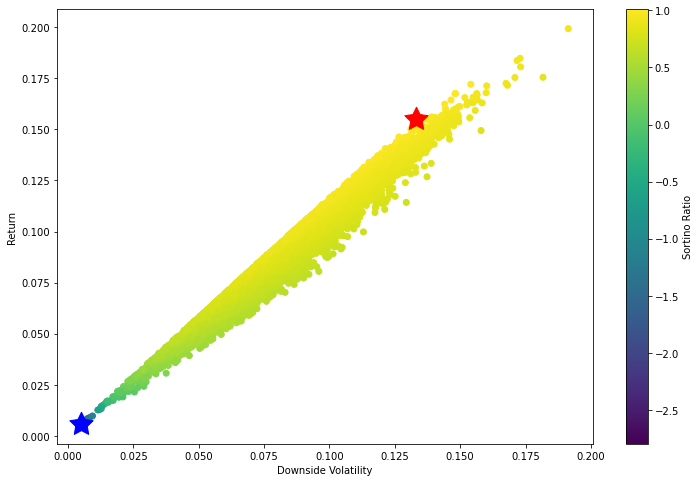

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

#plt.title('Maximum Sortino Ratio - Banking Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [26]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.1691, 0.2443, 0.3941, 0.0650, 0.0021, 0.0532, 0.0432, 0.0291]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
        'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS'])
w_1.columns = ['weights']
w_1

[0.1691, 0.2443, 0.3941, 0.065, 0.0021, 0.0532, 0.0432, 0.0291]


weights
HDFCBANK.NS     0.1691
ICICIBANK.NS    0.2443
KOTAKBANK.NS    0.3941
AXISBANK.NS     0.0650
SBIN.NS         0.0021
INDUSINDBK.NS   0.0532
FEDERALBNK.NS   0.0432
IDFCFIRSTB.NS   0.0291

In [27]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.2627, 0.0167, 0.4968, 0.0213, 0.0483, 0.0181, 0.0641, 0.0731]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
        'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS'])
w_2.columns = ['weights']
w_2

weights
HDFCBANK.NS     0.2627
ICICIBANK.NS    0.0167
KOTAKBANK.NS    0.4968
AXISBANK.NS     0.0213
SBIN.NS         0.0483
INDUSINDBK.NS   0.0181
FEDERALBNK.NS   0.0641
IDFCFIRSTB.NS   0.0731

In [28]:
# Portfolio with the maximum Calmar Ratio
w_raw = [0.0231, 0.0024, 0.3341, 0.2934, 0.1223, 0.0385, 0.0477, 0.1385]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_3 = pd.DataFrame(w_raw, index = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
        'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS'])
w_3.columns = ['weights']
w_3

weights
HDFCBANK.NS     0.0231
ICICIBANK.NS    0.0024
KOTAKBANK.NS    0.3341
AXISBANK.NS     0.2934
SBIN.NS         0.1223
INDUSINDBK.NS   0.0385
FEDERALBNK.NS   0.0477
IDFCFIRSTB.NS   0.1385

In [29]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
HDFCBANK.NS          0.1691         0.2627        0.0231
ICICIBANK.NS         0.2443         0.0167        0.0024
KOTAKBANK.NS         0.3941         0.4968        0.3341
AXISBANK.NS          0.0650         0.0213        0.2934
SBIN.NS              0.0021         0.0483        0.1223
INDUSINDBK.NS        0.0532         0.0181        0.0385
FEDERALBNK.NS        0.0432         0.0641        0.0477
IDFCFIRSTB.NS        0.0291         0.0731        0.1385

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

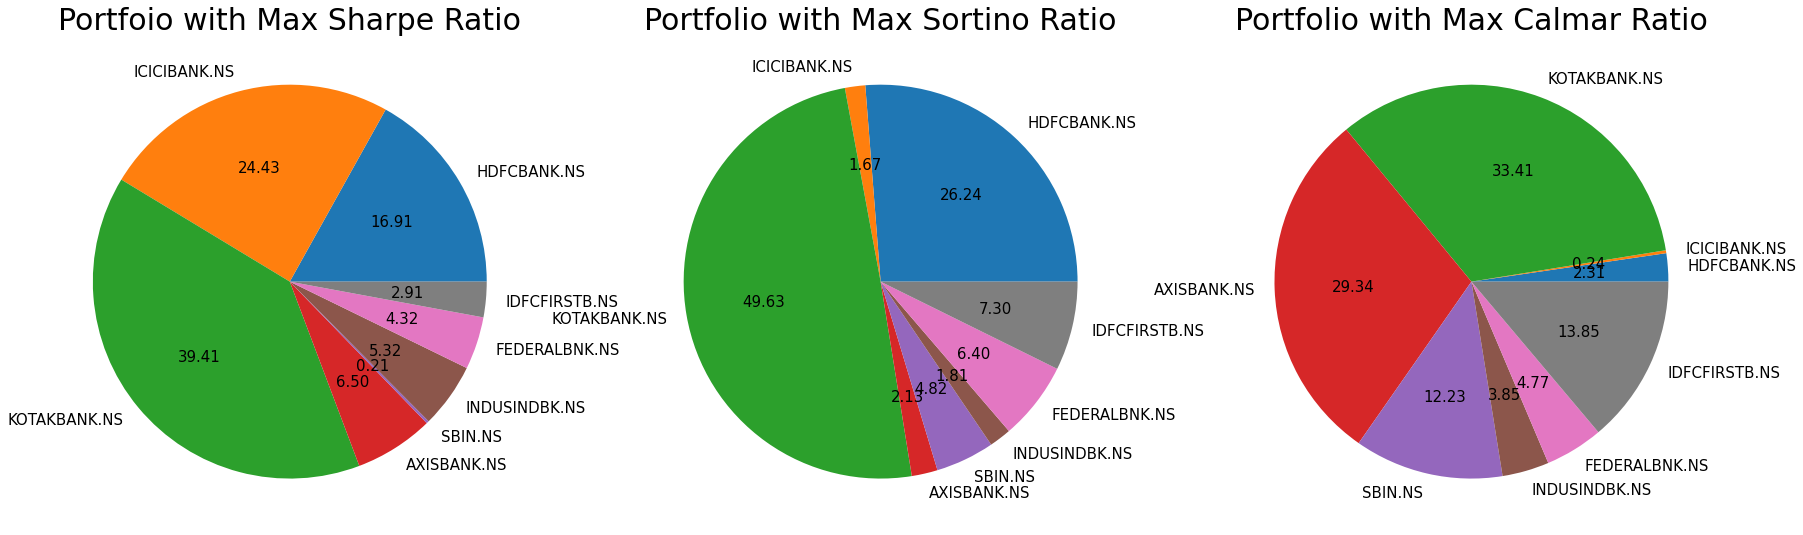

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax3.set_title('Portfolio with Max Calmar Ratio',fontsize = 30)

In [24]:
df_training.shape

(987, 8)

In [25]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_test.index)

In [26]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                    0.001431                    -0.002682   
2017-01-04                   -0.013880                    -0.014517   
2017-01-05                    0.011438                     0.006701   
2017-01-06                    0.012057                     0.014218   
2017-01-09                   -0.001773                    -0.001990   
2017-01-10                    0.006227                     0.008037   
2017-01-11                    0.021822                     0.021181   
2017-01-12                    0.002785                    -0.000229   
2017-01-13                    0.001764                     0.000398   
2017-01-16                    0.007356                     0.009408   
2017-01-17                   -0.002875                    -0.003578   
2017-01-18                    0.004974                     0.006384   
2017-01-19                   -0.002119                    -0.003402   
2017-01-20                   -0.013405                    -0.007911   
2017-01-23                    0.000606                     0.008730   
2017-01-24                    0.010587                     0.013430   
2017-01-25                    0.035650                     0.042402   
2017-01-27                    0.005499                    -0.007480   
2017-01-30                   -0.008463                    -0.009972   
2017-01-31                   -0.004180                    -0.004840   

            Max Calmar Ratio Portfolio  
Date                                    
2017-01-03                    0.004401  
2017-01-04                   -0.012434  
2017-01-05                    0.010016  
2017-01-06                    0.007391  
2017-01-09                   -0.000396  
2017-01-10                    0.000081  
2017-01-11                    0.020236  
2017-01-12                    0.000093  
2017-01-13                    0.011254  
2017-01-16                    0.009831  
2017-01-17                    0.005552  
2017-01-18                    0.006065  
2017-01-19                   -0.004509  
2017-01-20                   -0.029710  
2017-01-23                    0.003149  
2017-01-24                    0.011287  
2017-01-25                    0.037661  
2017-01-27                   -0.002152  
2017-01-30                   -0.008609  
2017-01-31                   -0.010680

<AxesSubplot:xlabel='Date', ylabel='Return'>

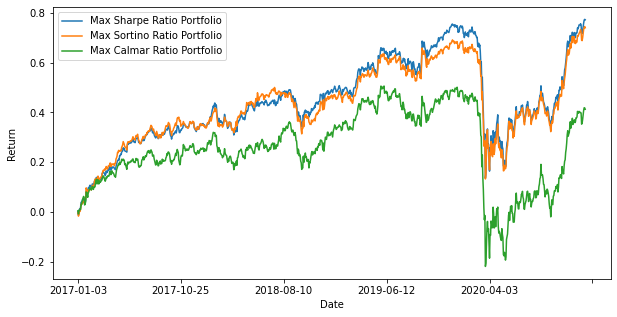

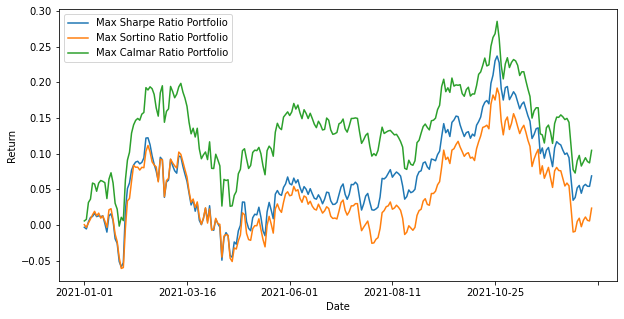

In [27]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [28]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.197157
Max Sortino Ratio Portfolio    0.189001
Max Calmar Ratio Portfolio     0.105282
dtype: float64

In [29]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.069829
Max Sortino Ratio Portfolio    0.023865
Max Calmar Ratio Portfolio     0.106256
dtype: float64